In [3]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, log_loss
import itertools
from sklearn import svm

## K-Nearest Neighbors
It is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

We will see telecommunication customer segmentation, the target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 
##### 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64


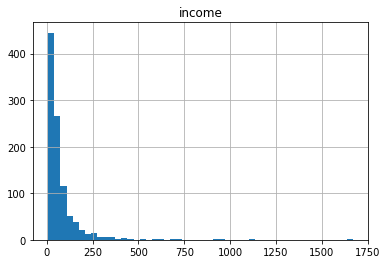

In [4]:
df = pd.read_csv("telecom.csv")
print(df['custcat'].value_counts())  # how many do we have in each class
df.hist(column="income", bins=50)
plt.show()

In [131]:
# to use scikit learn library we have to convert the pandas data frame to Numpy array
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 
        'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']].values
y = df['custcat'].values

#Standazation of data gives the data zero mean and unit variance, it is good for this type
# of algorithms
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  #spliting the data
print(f'Train set: {x_train.shape, y_train.shape} \nTest set: {x_test.shape, y_test.shape}')

k = 10
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)  # train the model
yhat = neigh.predict(x_test) #predcting


#Accuracy evaluation using the function accuracy classiification score(jaccard_score function)
trainAcc = metrics.accuracy_score(y_train, neigh.predict(x_train))
testAcc = metrics.accuracy_score(y_test, yhat)
print(f'Training accuracy: {trainAcc}\nTesting accuracy: {testAcc}')

Train set: ((800, 12), (800,)) 
Test set: ((200, 12), (200,))
Training accuracy: 0.8325
Testing accuracy: 0.73


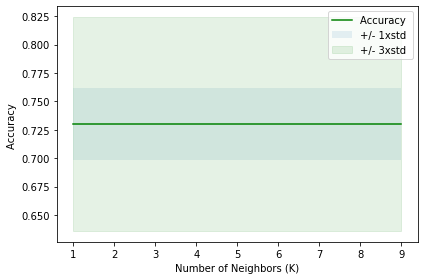

In [132]:
testAcc = np.zeros(k-1)
std_acc = np.zeros(k-1)
for n in range(1, k):
    testAcc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

#plot the accuracy of the model 
plt.plot(range(1,k),testAcc,'g')
plt.fill_between(range(1, k),testAcc - 1 * std_acc, testAcc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, k),testAcc - 3 * std_acc,testAcc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## Decision Tree
The problem we will be solving, imagine You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

      Drug
179  drugY
83   drugA
25   drugY
190  drugY
159  drugX
['drugY' 'drugA' 'drugY' 'drugY' 'drugX']
Decision tree accuracy: 0.9833333333333333


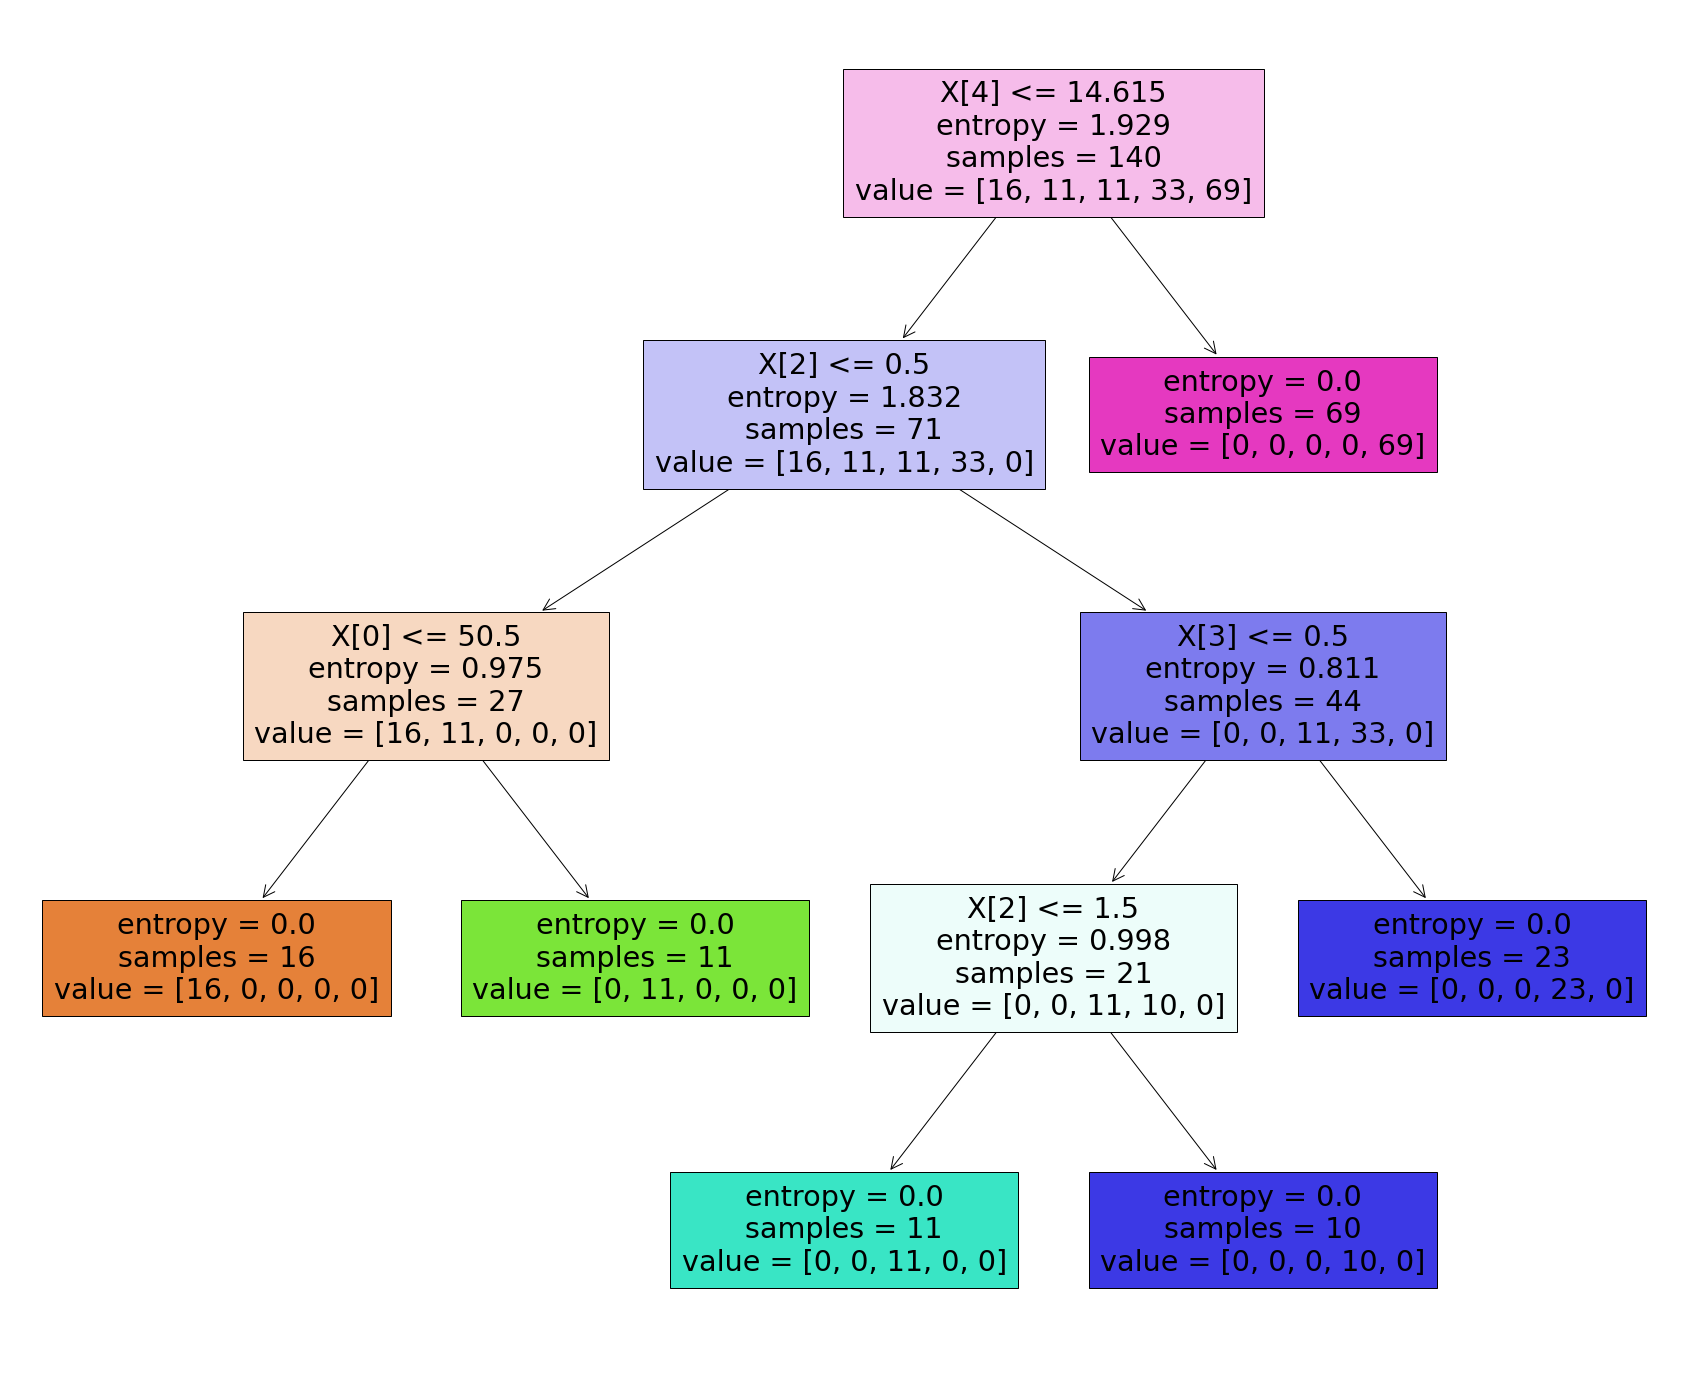

In [347]:
dfDrug = pd.read_csv("drug200.csv")
x = np.asanyarray(dfDrug[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']])
y = dfDrug[['Drug']]

# some values like Sex, BP are not numbers we need to convert them to numbers  because
# sklean can't handle categorical variable
list = [['F', 'M'], ['LOW', 'NORMAL', 'HIGH'], ['NORMAL', 'HIGH']]
j = 1
for i in list:
    convert = preprocessing.LabelEncoder()
    convert.fit(i)
    x[:,j] = convert.transform(x[:,j])
    j += 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Modeling
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree.fit(x_train, y_train) #train
predTree = drugTree.predict(x_test) #predict
print(y_test[10:15])
print(predTree[10:15])

# Evaluation
accuracy = metrics.accuracy_score(y_test, predTree)
print("Decision tree accuracy:", accuracy)

#visualization
fig = plt.figure(figsize=(30,25))
tree.plot_tree(drugTree, filled=True)
# _ = plt.show()
fig.savefig("Decision_tree_model.png")

## Logistic Regression
In this task the problem that we will be solving is, telecommunication company is concerned aboutthe number of customers leaving their hand-line business for cabe competitors. They need to understand who is leaving and why.
It is obvious that it is less expensive to keep customer than acquiring new ones, so we will analyze who will stay with us and the behaviors to retain customers

Train shape: ((160, 7), (160,)) 
Test shape: ((40, 7), (40,))
F1 Score: 0.8275862068965517 
Log loss: 0.6017092478101185
jaccard index:  0.7058823529411765
Confusion matrix without normalization
[[ 6  9]
 [ 1 24]]


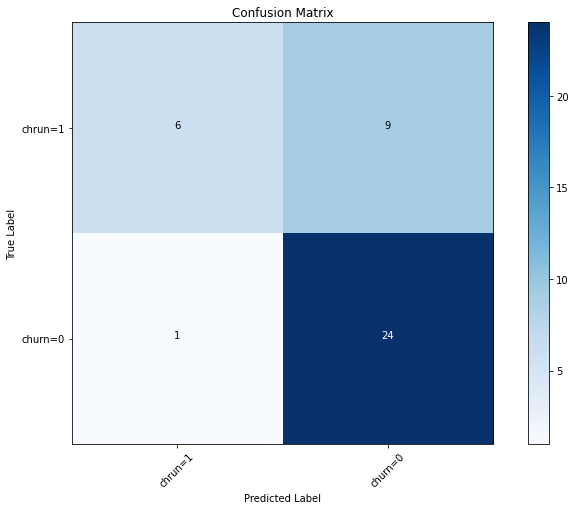

In [5]:
dfChurn = pd.read_csv("ChurnData.csv")

# let's select some data for the modeling, and change datatypes to int because of scikit
dfChurn[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip', 'callcard', 'wireless','churn']]
dfChurn['chrun'] = dfChurn['churn'].astype('int')

# define x and y of the dataset
x = np.asarray(dfChurn[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(dfChurn['churn'])

# normalize the dataset
x = preprocessing.StandardScaler().fit(x).transform(x)

# train and test splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print(f'Train shape: {x_train.shape, y_train.shape} \nTest shape: {x_test.shape, y_test.shape}')

# Modeling
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train) # train
yhat = LR.predict(x_test) # predict
# print(yhat[10:15])
# print(y_test[10:15])

# predicct_proba returns estimate for all classes ordered by the label of classes
yhat_prob = LR.predict_proba(x_test) # 1st column is P(0) and 2nd is P(1)

# Evaluation
jaccard = jaccard_score(y_test, yhat,pos_label=0)   # jaccard index
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
F1_score = f1_score(y_test, yhat, pos_label=0)
f1_score(y_test, yhat)
Log_loss = log_loss(y_test, yhat_prob)
print(f"F1 Score: {F1_score} \nLog loss: {Log_loss}")
print("jaccard index: ", jaccard)
# confusion matrix or F-1 score evaluation metrics in classification
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    threshold = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center',
        color='white' if cm[i,j] > threshold else 'black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=['chrun=1', 'churn=0'], normalize=False, title="Confusion Matrix")

## Support Vector Machine (SVM)
SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.
### Problem
In this problem we will try to classify whether a patient has Benign or Malignant early stage of cancer.
The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4)

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |
<br>

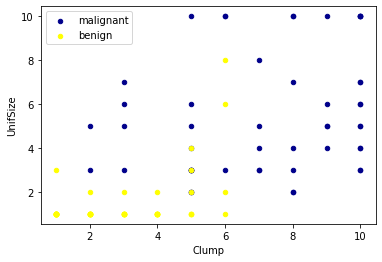

Train shape x, y: ((546, 9), (546,))       
Test shape x, y: ((137, 9), (137,))
Confusion matrix without normalization
[[85  5]
 [ 0 47]]
Jaccard index: 0.9444444444444444 
F1 score: 0.9639038982104676


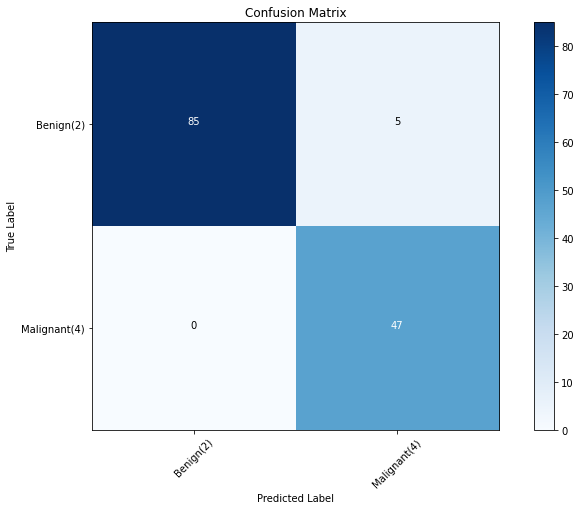

In [6]:
dfCell = pd.read_csv("cell_samples.csv")

# Let's examine the distribution of Classes based on Clump thickness and  uniformity of cell sieze:
malignant = dfCell[dfCell['Class']==4][0:50]
benign = dfCell[dfCell['Class']==2][0:50]
plot_mal = malignant.plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')
plot_ben = benign.plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=plot_mal)
plt.show()

# Data processing and selection, 'BareNuc' data type is object we need to convert it 
dfCell = dfCell[pd.to_numeric(dfCell['BareNuc'], errors='coerce').notnull()]
dfCell['BareNuc'] = dfCell['BareNuc'].astype('int')

cell_features = dfCell[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asarray(cell_features)
y = np.asarray(dfCell['Class'])

# Splitting the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print(f'Train shape x, y: {x_train.shape, y_train.shape} \
      \nTest shape x, y: {x_test.shape, y_test.shape}')

# Modeling SVM, we will use radial basis function(rbf) type of kernelling to map the data
# into higher dimension
s_v_m = svm.SVC(kernel='rbf')
s_v_m.fit(x_train, y_train)   # train
yhat = s_v_m.predict(x_test)  # predict

cell_CM = confusion_matrix(y_test, yhat, labels=[2,4]) # calculating confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cell_CM, classes=['Benign(2)', 'Malignant(4)'], normalize=False)
cell_jaccard = jaccard_score(y_test, yhat, pos_label=2)
cell_f1Score = f1_score(y_test, yhat, average='weighted')
print(f'Jaccard index: {cell_jaccard} \nF1 score: {cell_f1Score}')

In [110]:
print(yhat[10:15])
print(y_test[10:15])

[2 4 4 4 4]
[2 4 4 4 4]
